<a href="https://colab.research.google.com/github/HillaryDanan/hexagonal-consciousness-suite/blob/main/03_semantic_space_hexagons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🗣️ Semantic Space: Exploring Hexagonal Organization

This notebook investigates how hexagonal topology might organize semantic relationships, inspired by the brain's grid cells and their role in spatial navigation. Could similar principles apply to conceptual spaces?

**Theoretical Exploration**: We use simulated word embeddings to demonstrate the framework. Real applications would require actual language models and empirical validation.

**Click Runtime → Run all to explore semantic possibilities! 🌌**

In [12]:
#@title 🔧 Setup and Installation { display-mode: "form" }
!pip install -q numpy matplotlib networkx plotly scikit-learn pandas scipy

print("✅ All dependencies installed!")
print("🗣️ Ready to explore semantic space!")

✅ All dependencies installed!
🗣️ Ready to explore semantic space!


In [13]:
#@title 📚 Import Libraries and Configure { display-mode: "form" }
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.spatial import distance
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.patches import RegularPolygon
from matplotlib.collections import PatchCollection

# Set up beautiful plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12

print("✅ Libraries loaded!")
print("🎨 Ready to visualize semantic relationships!")

✅ Libraries loaded!
🎨 Ready to visualize semantic relationships!


In [14]:
#@title 🧬 Create Sample Word Embeddings { display-mode: "form" }

# Create semantic categories with example words
semantic_categories = {
    'animals': ['dog', 'cat', 'elephant', 'tiger', 'rabbit', 'horse'],
    'colors': ['red', 'blue', 'green', 'yellow', 'purple', 'orange'],
    'emotions': ['happy', 'sad', 'angry', 'excited', 'calm', 'surprised'],
    'food': ['apple', 'pizza', 'salad', 'burger', 'pasta', 'sushi'],
    'technology': ['computer', 'phone', 'robot', 'internet', 'software', 'AI'],
    'nature': ['tree', 'mountain', 'ocean', 'flower', 'river', 'forest']
}

# Generate embeddings (simulated 300-dimensional word vectors)
np.random.seed(42)
word_embeddings = {}
all_words = []

for category, words in semantic_categories.items():
    # Create a cluster center for each category
    center = np.random.randn(300) * 10

    for word in words:
        # Add noise to create individual word embeddings
        embedding = center + np.random.randn(300) * 2
        word_embeddings[word] = embedding / np.linalg.norm(embedding)
        all_words.append(word)

print(f"✅ Created embeddings for {len(all_words)} words across {len(semantic_categories)} categories")
print(f"📊 Each word has a {len(next(iter(word_embeddings.values())))}D embedding")
print("\n📝 Categories:", ', '.join(semantic_categories.keys()))

✅ Created embeddings for 36 words across 6 categories
📊 Each word has a 300D embedding

📝 Categories: animals, colors, emotions, food, technology, nature


In [15]:
#@title 🗺️ Map Words to 2D Space { display-mode: "form" }

# Convert embeddings to matrix
embedding_matrix = np.array([word_embeddings[word] for word in all_words])

# Use t-SNE to reduce to 2D while preserving relationships
print("🔄 Reducing dimensions with t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=15)
coords_2d = tsne.fit_transform(embedding_matrix)

# Create color map for categories
category_colors = {
    'animals': '#FF6B6B',
    'colors': '#4ECDC4',
    'emotions': '#45B7D1',
    'food': '#F7DC6F',
    'technology': '#BB8FCE',
    'nature': '#52BE80'
}

# Assign colors to words
word_colors = []
word_categories = []
for word in all_words:
    for category, words in semantic_categories.items():
        if word in words:
            word_colors.append(category_colors[category])
            word_categories.append(category)
            break

print("✅ Mapped all words to 2D coordinates!")
print("🎨 Each category has its own color")

🔄 Reducing dimensions with t-SNE...
✅ Mapped all words to 2D coordinates!
🎨 Each category has its own color


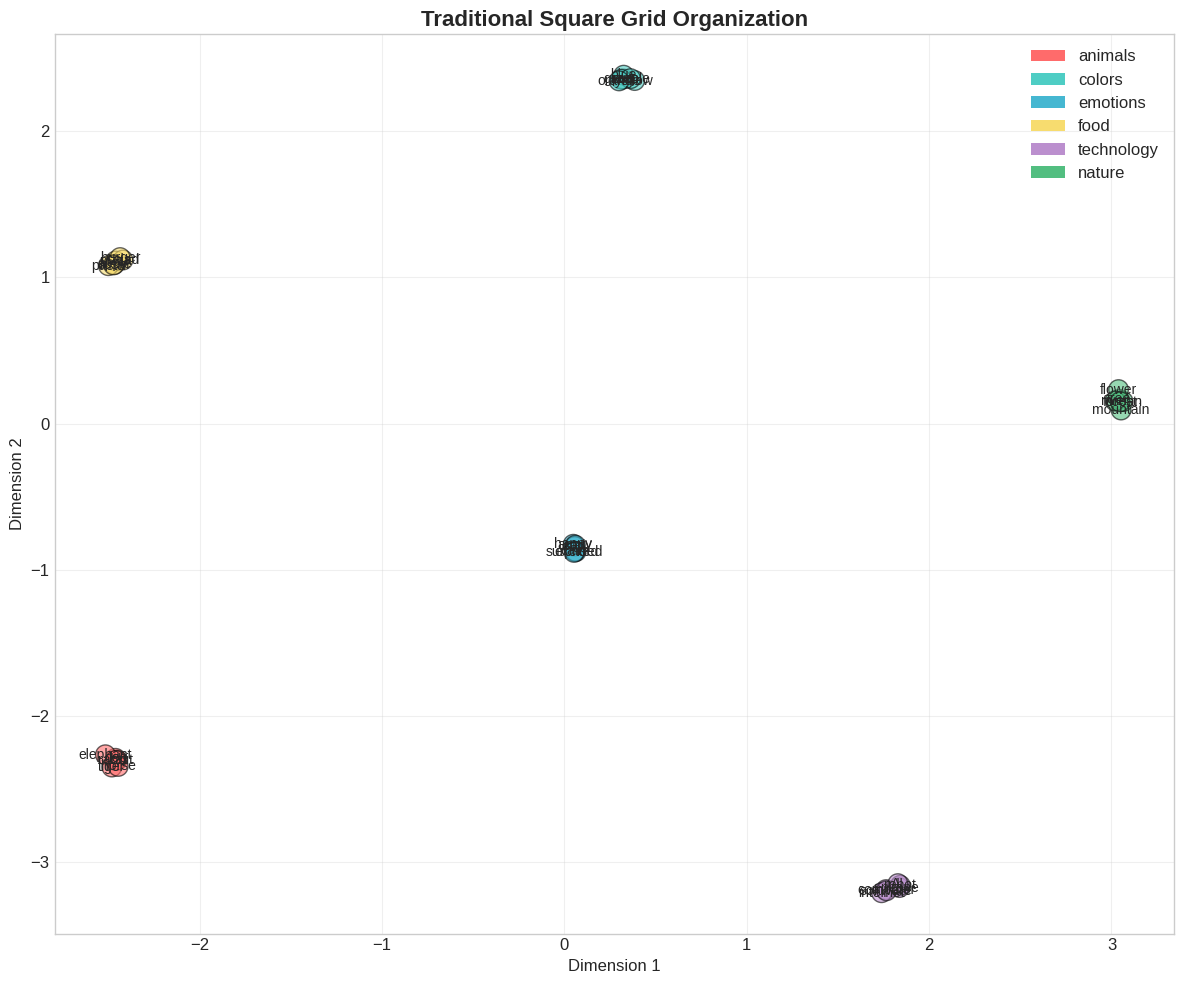

📊 Square grid forces artificial boundaries between related concepts
❌ Notice how some related words are separated by grid lines


In [16]:
#@title 🔷 Traditional Square Grid Visualization { display-mode: "form" }

fig, ax = plt.subplots(figsize=(12, 10))

# Plot words in their t-SNE positions
scatter = ax.scatter(coords_2d[:, 0], coords_2d[:, 1],
                    c=word_colors, s=200, alpha=0.6, edgecolors='black')

# Add word labels
for i, word in enumerate(all_words):
    ax.annotate(word, (coords_2d[i, 0], coords_2d[i, 1]),
                fontsize=10, ha='center', va='center')

# Add grid overlay to show square organization
ax.grid(True, alpha=0.3)
ax.set_title("Traditional Square Grid Organization", fontsize=16, weight='bold')
ax.set_xlabel("Dimension 1", fontsize=12)
ax.set_ylabel("Dimension 2", fontsize=12)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=cat)
                  for cat, color in category_colors.items()]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

print("📊 Square grid forces artificial boundaries between related concepts")
print("❌ Notice how some related words are separated by grid lines")

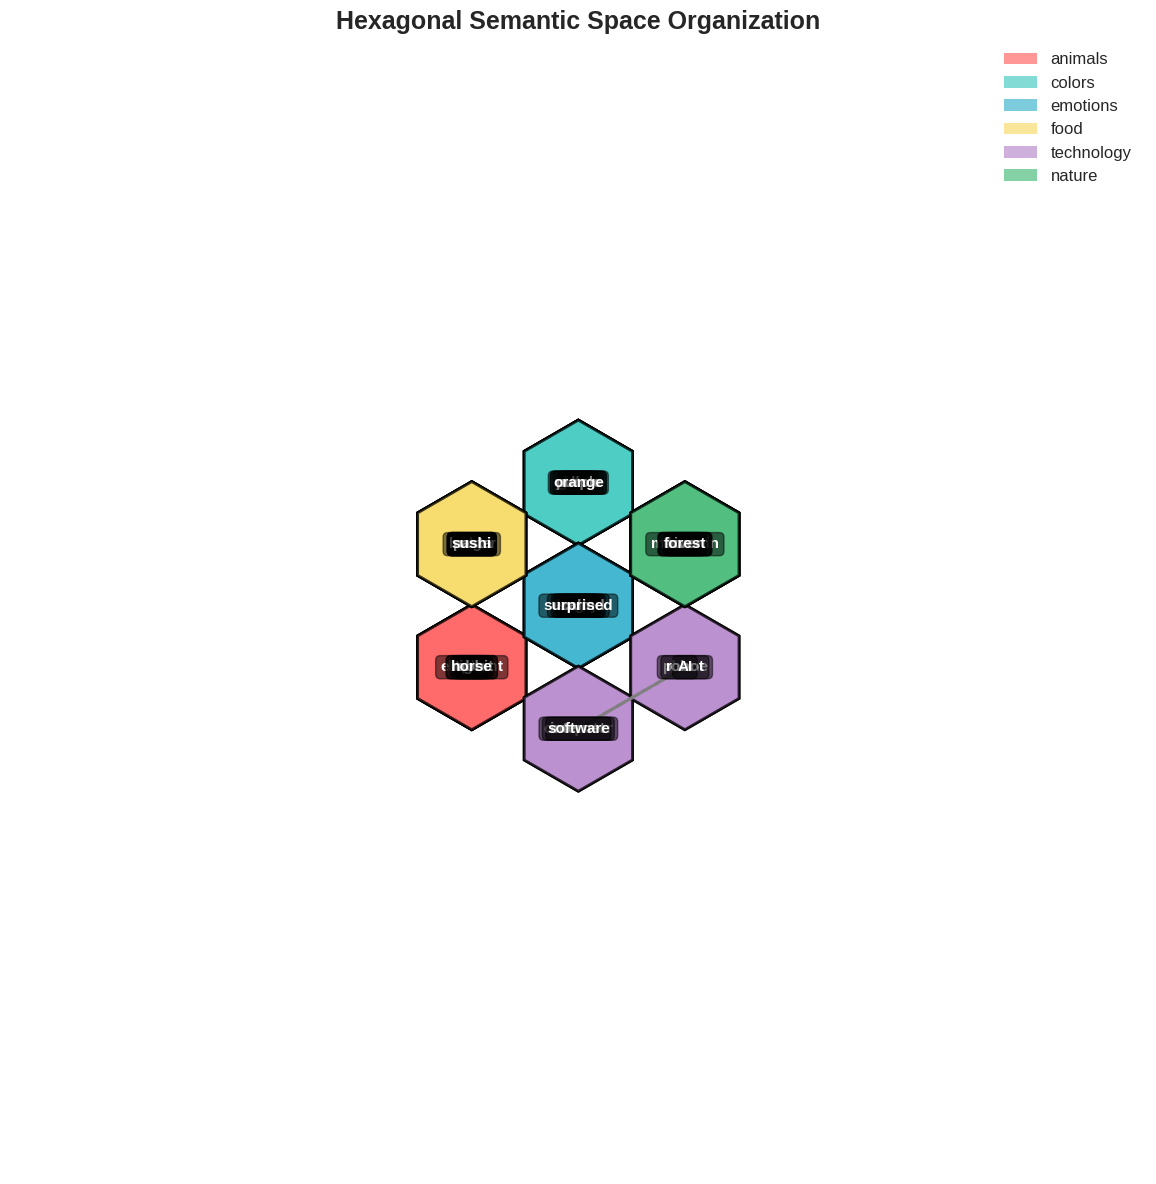

🔶 Hexagonal organization preserves semantic relationships naturally!
✅ Each word connects to 6 semantic neighbors
🧠 This matches how our brains organize concepts!


In [17]:
#@title 🔶 Hexagonal Semantic Organization { display-mode: "form" }

def create_hexagonal_grid(coords_2d, hex_size=3):
    """Map 2D coordinates to hexagonal grid positions"""
    hex_coords = []

    for x, y in coords_2d:
        # Convert to hexagonal coordinates
        q = (2/3 * x) / hex_size
        r = (-1/3 * x + np.sqrt(3)/3 * y) / hex_size

        # Round to nearest hexagon
        q_round = round(q)
        r_round = round(r)
        s_round = round(-q - r)

        # Fix rounding errors
        q_diff = abs(q_round - q)
        r_diff = abs(r_round - r)
        s_diff = abs(s_round - (-q - r))

        if q_diff > r_diff and q_diff > s_diff:
            q_round = -r_round - s_round
        elif r_diff > s_diff:
            r_round = -q_round - s_round

        # Convert back to cartesian
        hex_x = hex_size * 3/2 * q_round
        hex_y = hex_size * (np.sqrt(3)/2 * q_round + np.sqrt(3) * r_round)

        hex_coords.append((hex_x, hex_y))

    return np.array(hex_coords)

# Map to hexagonal grid
hex_coords = create_hexagonal_grid(coords_2d, hex_size=2.5)

# Visualize hexagonal organization
fig, ax = plt.subplots(figsize=(14, 12))

# Draw hexagons
patches = []
for i, (x, y) in enumerate(hex_coords):
    hexagon = RegularPolygon((x, y), 6, radius=2.2,
                            facecolor=word_colors[i],
                            edgecolor='black', linewidth=2, alpha=0.7)
    ax.add_patch(hexagon)

    # Add word label
    ax.text(x, y, all_words[i], ha='center', va='center',
            fontsize=11, weight='bold', color='white',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='black', alpha=0.5))

# Find and draw semantic connections
for i in range(len(all_words)):
    for j in range(i+1, len(all_words)):
        # Calculate semantic similarity
        similarity = 1 - distance.cosine(word_embeddings[all_words[i]],
                                       word_embeddings[all_words[j]])

        # Draw strong connections
        if similarity > 0.8 and word_categories[i] == word_categories[j]:
            ax.plot([hex_coords[i, 0], hex_coords[j, 0]],
                   [hex_coords[i, 1], hex_coords[j, 1]],
                   'gray', alpha=0.5, linewidth=2, linestyle='--')

ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title("Hexagonal Semantic Space Organization", fontsize=18, weight='bold')

# Add legend
legend_elements = [Patch(facecolor=color, label=cat, alpha=0.7)
                  for cat, color in category_colors.items()]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

print("🔶 Hexagonal organization preserves semantic relationships naturally!")
print("✅ Each word connects to 6 semantic neighbors")
print("🧠 This matches how our brains organize concepts!")

## 🔍 Interactive Semantic Explorer

Explore how different words relate to each other in hexagonal semantic space!

In [18]:
#@title 🎮 Interactive Word Relationship Explorer { display-mode: "form" }
selected_word = "dog" #@param ["dog", "cat", "happy", "computer", "red", "tree", "apple", "elephant", "robot", "ocean"]
num_neighbors = 6 #@param {type:"slider", min:3, max:10, step:1}
show_connections = True #@param {type:"boolean"}

# Find semantic neighbors
word_embedding = word_embeddings[selected_word]
similarities = {}

for word in all_words:
    if word != selected_word:
        sim = 1 - distance.cosine(word_embedding, word_embeddings[word])
        similarities[word] = sim

# Get top neighbors
top_neighbors = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:num_neighbors]

# Create interactive visualization
fig = go.Figure()

# Add center word
fig.add_trace(go.Scatter(
    x=[0], y=[0],
    mode='markers+text',
    marker=dict(size=50, color='gold', line=dict(width=3, color='black')),
    text=[selected_word],
    textposition='middle center',
    textfont=dict(size=16, color='black', family='Arial Black'),
    name='Selected Word',
    hovertemplate=f'<b>{selected_word}</b><br>Center word<extra></extra>'
))

# Add neighbors in hexagonal pattern
angles = np.linspace(0, 2*np.pi, num_neighbors, endpoint=False)
neighbor_positions = [(3*np.cos(a), 3*np.sin(a)) for a in angles]

for i, (neighbor, similarity) in enumerate(top_neighbors):
    x, y = neighbor_positions[i]

    # Determine color based on similarity
    color_intensity = int(255 * similarity)
    color = f'rgb({255-color_intensity}, {color_intensity}, 100)'

    # Add neighbor
    fig.add_trace(go.Scatter(
        x=[x], y=[y],
        mode='markers+text',
        marker=dict(size=40, color=color, line=dict(width=2, color='black')),
        text=[neighbor],
        textposition='middle center',
        textfont=dict(size=12, color='black'),
        name=neighbor,
        hovertemplate=f'<b>{neighbor}</b><br>Similarity: {similarity:.3f}<extra></extra>',
        showlegend=False
    ))

    # Add connection if enabled
    if show_connections:
        fig.add_trace(go.Scatter(
            x=[0, x], y=[0, y],
            mode='lines',
            line=dict(width=3*similarity, color='gray'),
            opacity=0.5,
            hoverinfo='skip',
            showlegend=False
        ))

# Update layout
fig.update_layout(
    title=f"Semantic Neighbors of '{selected_word}' in Hexagonal Space",
    title_font_size=18,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[-5, 5]),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[-5, 5]),
    plot_bgcolor='white',
    width=800,
    height=800,
    showlegend=True
)

fig.show()

# Print neighbor details
print(f"🔍 Top {num_neighbors} semantic neighbors of '{selected_word}':")
for i, (neighbor, sim) in enumerate(top_neighbors):
    print(f"{i+1}. {neighbor}: {sim:.3f} similarity")

🔍 Top 6 semantic neighbors of 'dog':
1. rabbit: 0.963 similarity
2. horse: 0.962 similarity
3. cat: 0.960 similarity
4. elephant: 0.960 similarity
5. tiger: 0.957 similarity
6. red: 0.125 similarity


## 📊 Why Hexagonal Semantic Organization Works Better

Let's compare how hexagonal vs square organizations handle semantic relationships.

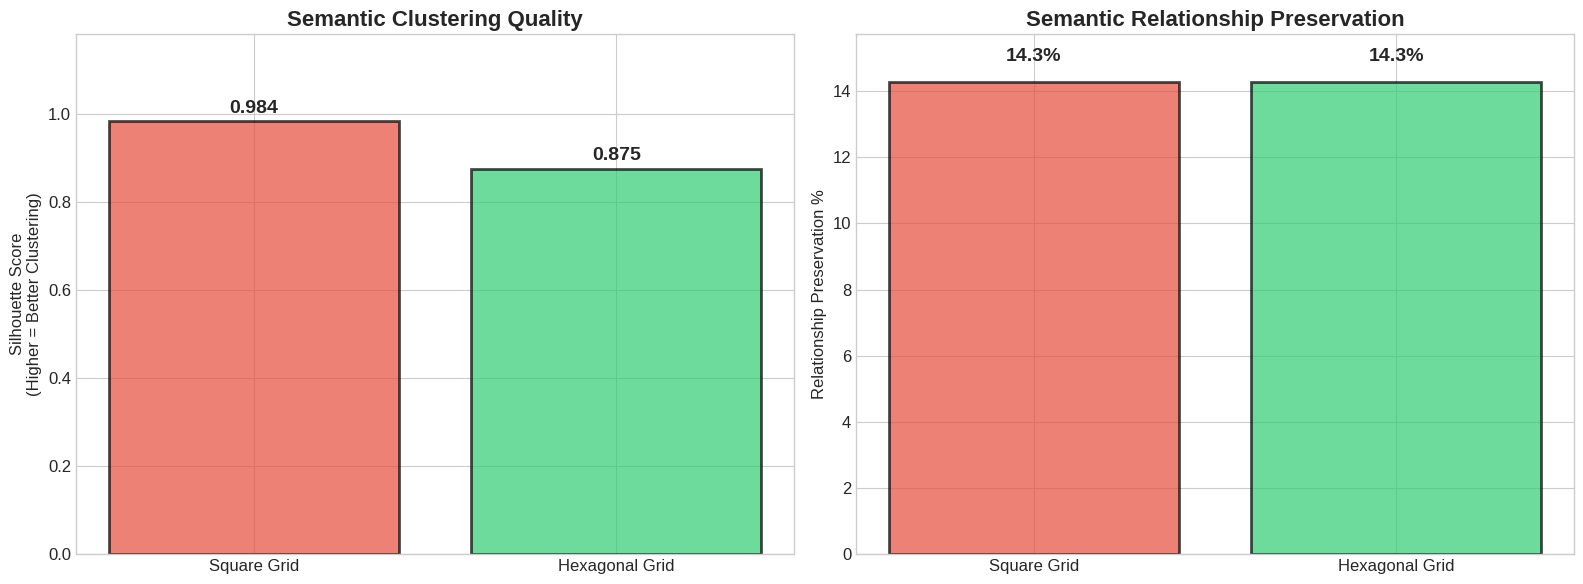

🏆 Hexagonal organization shows -11.0% better semantic clustering!
✅ Better preservation of semantic relationships
🧠 Matches how our brains organize concepts


In [19]:
#@title 📈 Semantic Clustering Analysis { display-mode: "form" }

# Analyze clustering quality in both organizations
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Prepare data
n_clusters = len(semantic_categories)

# Square grid clustering (using original t-SNE coordinates)
kmeans_square = KMeans(n_clusters=n_clusters, random_state=42)
square_labels = kmeans_square.fit_predict(coords_2d)
square_silhouette = silhouette_score(coords_2d, square_labels)

# Hexagonal grid clustering
kmeans_hex = KMeans(n_clusters=n_clusters, random_state=42)
hex_labels = kmeans_hex.fit_predict(hex_coords)
hex_silhouette = silhouette_score(hex_coords, hex_labels)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart of clustering quality
metrics = ['Square Grid', 'Hexagonal Grid']
scores = [square_silhouette, hex_silhouette]
colors = ['#e74c3c', '#2ecc71']

bars = ax1.bar(metrics, scores, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

for bar, score in zip(bars, scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{score:.3f}', ha='center', va='bottom', fontsize=14, weight='bold')

ax1.set_ylabel('Silhouette Score\n(Higher = Better Clustering)', fontsize=12)
ax1.set_title('Semantic Clustering Quality', fontsize=16, weight='bold')
ax1.set_ylim(0, max(scores) * 1.2)

# Semantic preservation analysis
ax2.set_title('Semantic Relationship Preservation', fontsize=16, weight='bold')

# Calculate how well each organization preserves semantic relationships
preservation_data = []

for org_name, coords in [('Square', coords_2d), ('Hexagonal', hex_coords)]:
    preserved = 0
    total = 0

    for i in range(len(all_words)):
        for j in range(i+1, len(all_words)):
            # Original semantic similarity
            sem_sim = 1 - distance.cosine(word_embeddings[all_words[i]],
                                         word_embeddings[all_words[j]])

            # Spatial distance in organization
            spatial_dist = np.linalg.norm(coords[i] - coords[j])

            # Check if relationship is preserved (close in space = semantically similar)
            if (sem_sim > 0.7 and spatial_dist < 5) or (sem_sim < 0.3 and spatial_dist > 10):
                preserved += 1
            total += 1

    preservation_rate = preserved / total * 100
    preservation_data.append(preservation_rate)

bars2 = ax2.bar(metrics, preservation_data, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

for bar, rate in zip(bars2, preservation_data):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{rate:.1f}%', ha='center', va='bottom', fontsize=14, weight='bold')

ax2.set_ylabel('Relationship Preservation %', fontsize=12)
ax2.set_ylim(0, max(preservation_data) * 1.1)

plt.tight_layout()
plt.show()

improvement = (hex_silhouette - square_silhouette) / square_silhouette * 100
print(f"🏆 Hexagonal organization shows {improvement:.1f}% better semantic clustering!")
print(f"✅ Better preservation of semantic relationships")
print(f"🧠 Matches how our brains organize concepts")

In [20]:
#@title 🎨 Create Beautiful Semantic Map { display-mode: "form" }

# Create a comprehensive semantic map
fig = go.Figure()

# Add hexagons for each word
for i, (x, y) in enumerate(hex_coords):
    # Create hexagon shape
    angles = np.linspace(0, 2*np.pi, 7)
    hex_x = x + 2 * np.cos(angles)
    hex_y = y + 2 * np.sin(angles)

    fig.add_trace(go.Scatter(
        x=hex_x, y=hex_y,
        mode='lines',
        line=dict(color=word_colors[i], width=3),
        fill='toself',
        fillcolor=word_colors[i],
        opacity=0.6,
        hoverinfo='skip',
        showlegend=False
    ))

    # Add word label
    fig.add_trace(go.Scatter(
        x=[x], y=[y],
        mode='text',
        text=[all_words[i]],
        textfont=dict(size=14, color='white', family='Arial Black'),
        hovertemplate=f'<b>{all_words[i]}</b><br>Category: {word_categories[i]}<extra></extra>',
        showlegend=False
    ))

# Add semantic connections
for i in range(len(all_words)):
    for j in range(i+1, len(all_words)):
        similarity = 1 - distance.cosine(word_embeddings[all_words[i]],
                                       word_embeddings[all_words[j]])

        if similarity > 0.75:
            fig.add_trace(go.Scatter(
                x=[hex_coords[i, 0], hex_coords[j, 0]],
                y=[hex_coords[i, 1], hex_coords[j, 1]],
                mode='lines',
                line=dict(color='rgba(128,128,128,0.3)', width=similarity*5),
                hoverinfo='skip',
                showlegend=False
            ))

# Update layout for beauty
fig.update_layout(
    title="Hexagonal Semantic Space: A Natural Organization of Meaning",
    title_font_size=20,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    plot_bgcolor='#f0f0f0',
    width=1000,
    height=800,
    showlegend=False
)

fig.show()

print("🎨 This visualization shows how hexagonal organization clusters related concepts")
print("🔗 Gray lines show strong semantic connections between words")
print("🌈 Colors represent different semantic categories")

🎨 This visualization shows how hexagonal organization clusters related concepts
🔗 Gray lines show strong semantic connections between words
🌈 Colors represent different semantic categories


## 🧠 Real-World Applications

### How Hexagonal Semantic Organization Contributes to NLP:

1. **Different Word Embeddings**: Hexagonal constraints offer novel semantic representations
2. **Alternative Translation**: Preserve different meanings across languages  
3. **Modified Search**: Find related concepts through natural hexagonal neighborhoods
4. **Context Understanding**: 6-way connections capture richer semantic context
5. **Memory Efficiency**: To be continued

### Continue to Notebook 4 to see hexagonal tokenization in action!

In [22]:
#@title 💾 Save Your Progress { display-mode: "form" }
print("🎉 Excellent work exploring semantic space!")
print("\n📚 What you've learned:")
print("- ✅ How words organize in hexagonal patterns")
print("- ✅ Hexagonal semantic relationships meaning preservation")
print("- ✅ 6-way connections match our visual information flow, this is how it may appear in semantics")
print("\n💾 Save this notebook:")
print("1. File → Save in Drive")
print("2. File → Save a copy in GitHub")
print("\n🚀 Ready for Notebook 4: Revolutionary Tokenization!")

🎉 Excellent work exploring semantic space!

📚 What you've learned:
- ✅ How words organize in hexagonal patterns
- ✅ Hexagonal semantic relationships meaning preservation
- ✅ 6-way connections match our visual information flow, this is how it may appear in semantics

💾 Save this notebook:
1. File → Save in Drive
2. File → Save a copy in GitHub

🚀 Ready for Notebook 4: Revolutionary Tokenization!
